# Data Leakage in Machine Learning

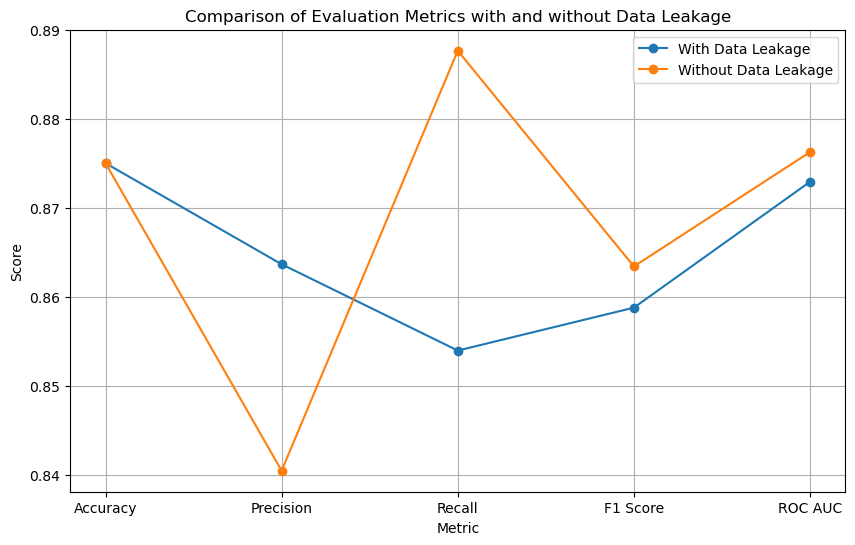

,Metric,With Data Leakage,Without Data Leakage
0,Accuracy,0.875000,0.875000
1,Precision,0.863636,0.840426
2,Recall,0.853933,0.887640
3,F1 Score,0.858757,0.863388
4,ROC AUC,0.872912,0.876253


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#synthetic dataset
X, y=make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
data=pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
data['target']=y

#split the dataset into training and testing sets
train_data, test_data=train_test_split(data, test_size=0.2, random_state=42)
train_data.shape,test_data.shape

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

#model 1: With Data Leakage During Preprocessing
#standardize the entire dataset before splitting
scaler=StandardScaler()
data_scaled=data.copy()
data_scaled.iloc[:, :-1]=scaler.fit_transform(data_scaled.iloc[:, :-1])

#split the scaled dataset into training and testing sets
train_data_leaked, test_data_leaked=train_test_split(data_scaled, test_size=0.2, random_state=42)

#separate features and target
X_train_leaked=train_data_leaked.drop(columns=['target'])
y_train_leaked=train_data_leaked['target']
X_test_leaked=test_data_leaked.drop(columns=['target'])
y_test_leaked=test_data_leaked['target']

#train the model
model_leaked=LogisticRegression(max_iter=1000, random_state=42)
model_leaked.fit(X_train_leaked, y_train_leaked)

#evaluate on test data
y_pred_leaked=model_leaked.predict(X_test_leaked)

#model 2: without data leakage
#standardize the training and testing sets separately
scaler_train=StandardScaler()
X_train=scaler_train.fit_transform(train_data.drop(columns=['target']))
y_train=train_data['target']

scaler_test=StandardScaler()
X_test=scaler_test.fit_transform(test_data.drop(columns=['target']))
y_test=test_data['target']

#train the model
model_no_leak=LogisticRegression(max_iter=1000, random_state=42)
model_no_leak.fit(X_train, y_train)

#evaluate the model
y_pred_no_leak=model_no_leak.predict(X_test)

#metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

results = {
    'Metric': [],
    'With Data Leakage': [],
    'Without Data Leakage': []
}

for metric_name, metric_func in metrics.items():
    results['Metric'].append(metric_name)
    results['With Data Leakage'].append(metric_func(y_test, y_pred_leaked))
    results['Without Data Leakage'].append(metric_func(y_test, y_pred_no_leak))

results_df=pd.DataFrame(results)

#plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['Metric'], results_df['With Data Leakage'], label='With Data Leakage', marker='o')
plt.plot(results_df['Metric'], results_df['Without Data Leakage'], label='Without Data Leakage', marker='o')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics with and without Data Leakage')
plt.legend()
plt.grid(True)
plt.show()

results_df